# TP 8 - Tomografía
Grupo 4 <br>
Integrantes:
- Pablo Smolkin
- Pedro Carranza Vélez
- Philippe Dutriez Diaz
- Francisco Daniel Ledesma

Nota: Las funciones utilizadas se encuentran en el archivo functions.py

In [1]:
from sys import path
from os.path import realpath
path.append(realpath("../")) # Makes it works everywhere
from common.functions import *
import cv2

In [83]:
from functions import *

In [4]:
%load_ext autoreload
%autoreload 2

***
## Transformada de Radon

In [5]:
from skimage.data import shepp_logan_phantom

(283, 180)


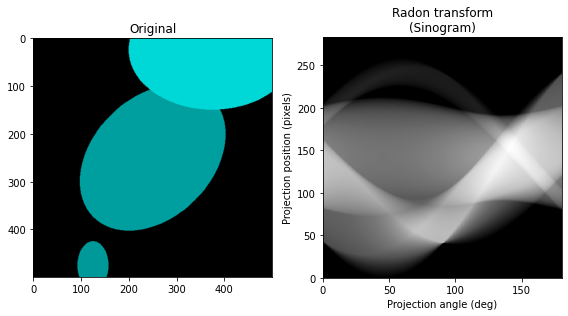

In [80]:
image = cv2.imread("img/elip_2.png")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

ax1.set_title("Original")
ax1.imshow(image, cmap=plt.cm.Greys_r)

theta, sinogram = radon_g4(image=image, start_deg=0., end_deg=180., step_deg=1.)

print(sinogram.shape)

dx, dy = 0.5 * 180.0 / max(image.shape), 0.5 / sinogram.shape[0]
ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(sinogram, cmap=plt.cm.Greys_r,
           extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy),
           aspect='auto')

fig.tight_layout()
plt.show()

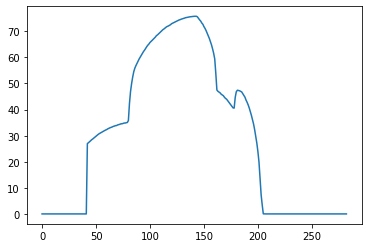

In [78]:
pixels, nulldeg = view_deg(sinogram, deg=0, step_deg=1)
plt.plot(pixels, nulldeg)

## Anti Transformada

In [9]:
from skimage.transform.radon_transform import _get_fourier_filter
from skimage.transform import iradon

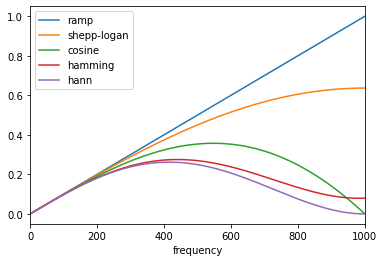

In [8]:
filters = ['ramp', 'shepp-logan', 'cosine', 'hamming', 'hann']

for ix, f in enumerate(filters):
    response = _get_fourier_filter(2000, f)
    plt.plot(response, label=f)

plt.xlim([0, 1000])
plt.xlabel('frequency')
plt.legend()
plt.show()

FBP rms reconstruction error: 0.0118


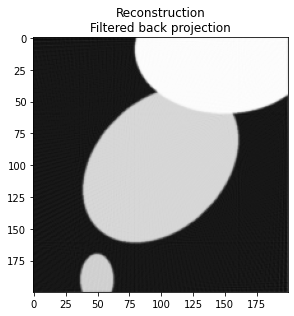

In [87]:
reconstruction_fbp, error = iradon_g4(image, sinogram, theta=theta, filter_name='ramp', interpolation='linear')
print(f'FBP rms reconstruction error: {error:.3g}')

imkwargs = dict(vmin=-0.2, vmax=0.2)
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 4.5),
                               sharex=True, sharey=True)
ax1.set_title("Reconstruction\nFiltered back projection")
ax1.imshow(reconstruction_fbp, cmap=plt.cm.Greys_r)
# ax2.set_title("Reconstruction error\nFiltered back projection")
# ax2.imshow(reconstruction_fbp - image, cmap=plt.cm.Greys_r, **imkwargs)
fig.tight_layout()
plt.show()